In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/fronted select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [10]:
mpl.rc('font', family = 'NanumGothic')

In [8]:
df1 = pd.read_csv('Data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


<Axes: xlabel='age', ylabel='Mileage'>

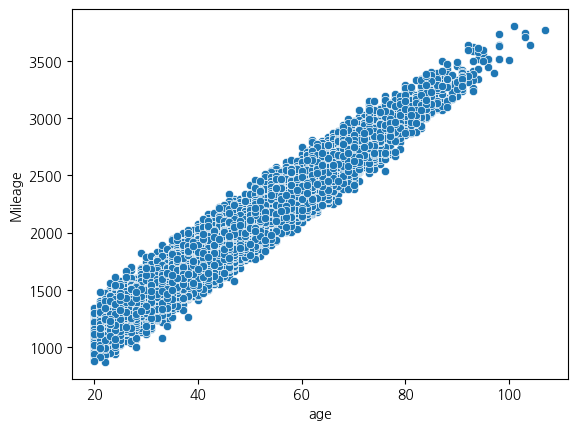

In [11]:
sns.scatterplot(data=df1, x='age', y='Mileage')

<Axes: xlabel='age', ylabel='Mileage'>

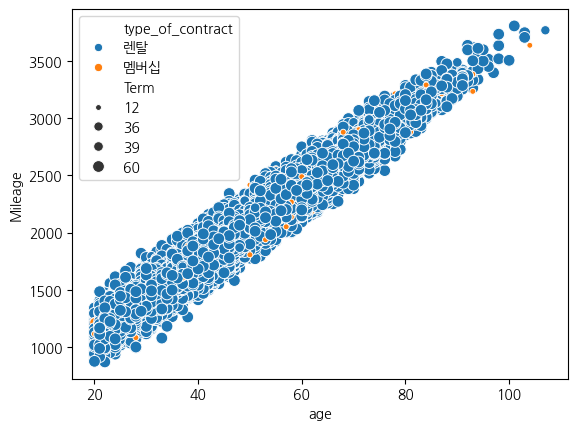

In [13]:
sns.scatterplot(data=df1, x='age', y='Mileage', hue = 'type_of_contract', size='Term')

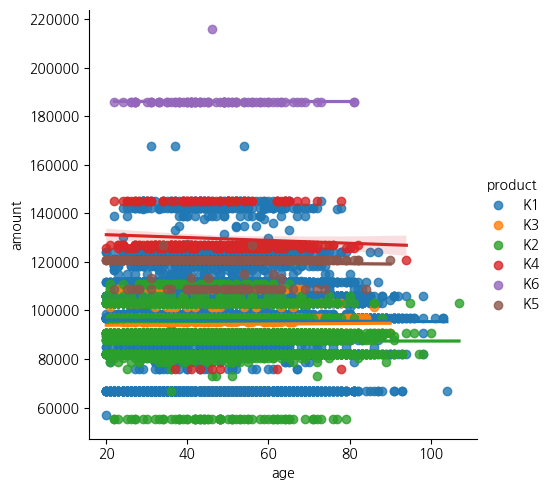

In [17]:
sns.lmplot(data = df1, x='age',y='amount', hue = 'product')

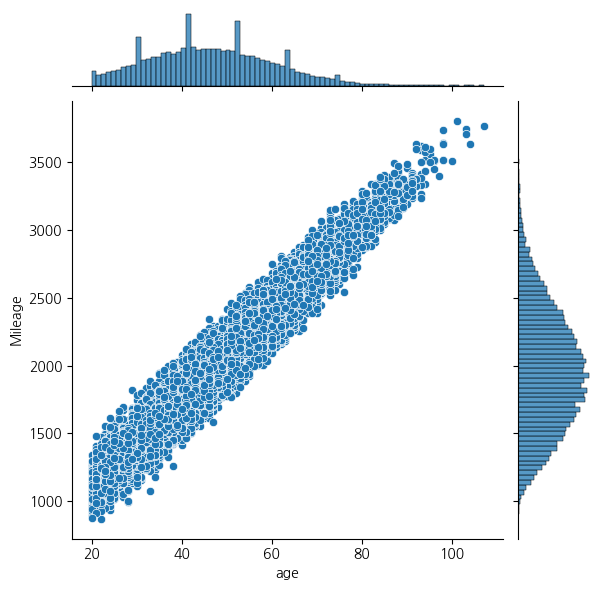

In [18]:
sns.jointplot(data=df1, x='age',y='Mileage')

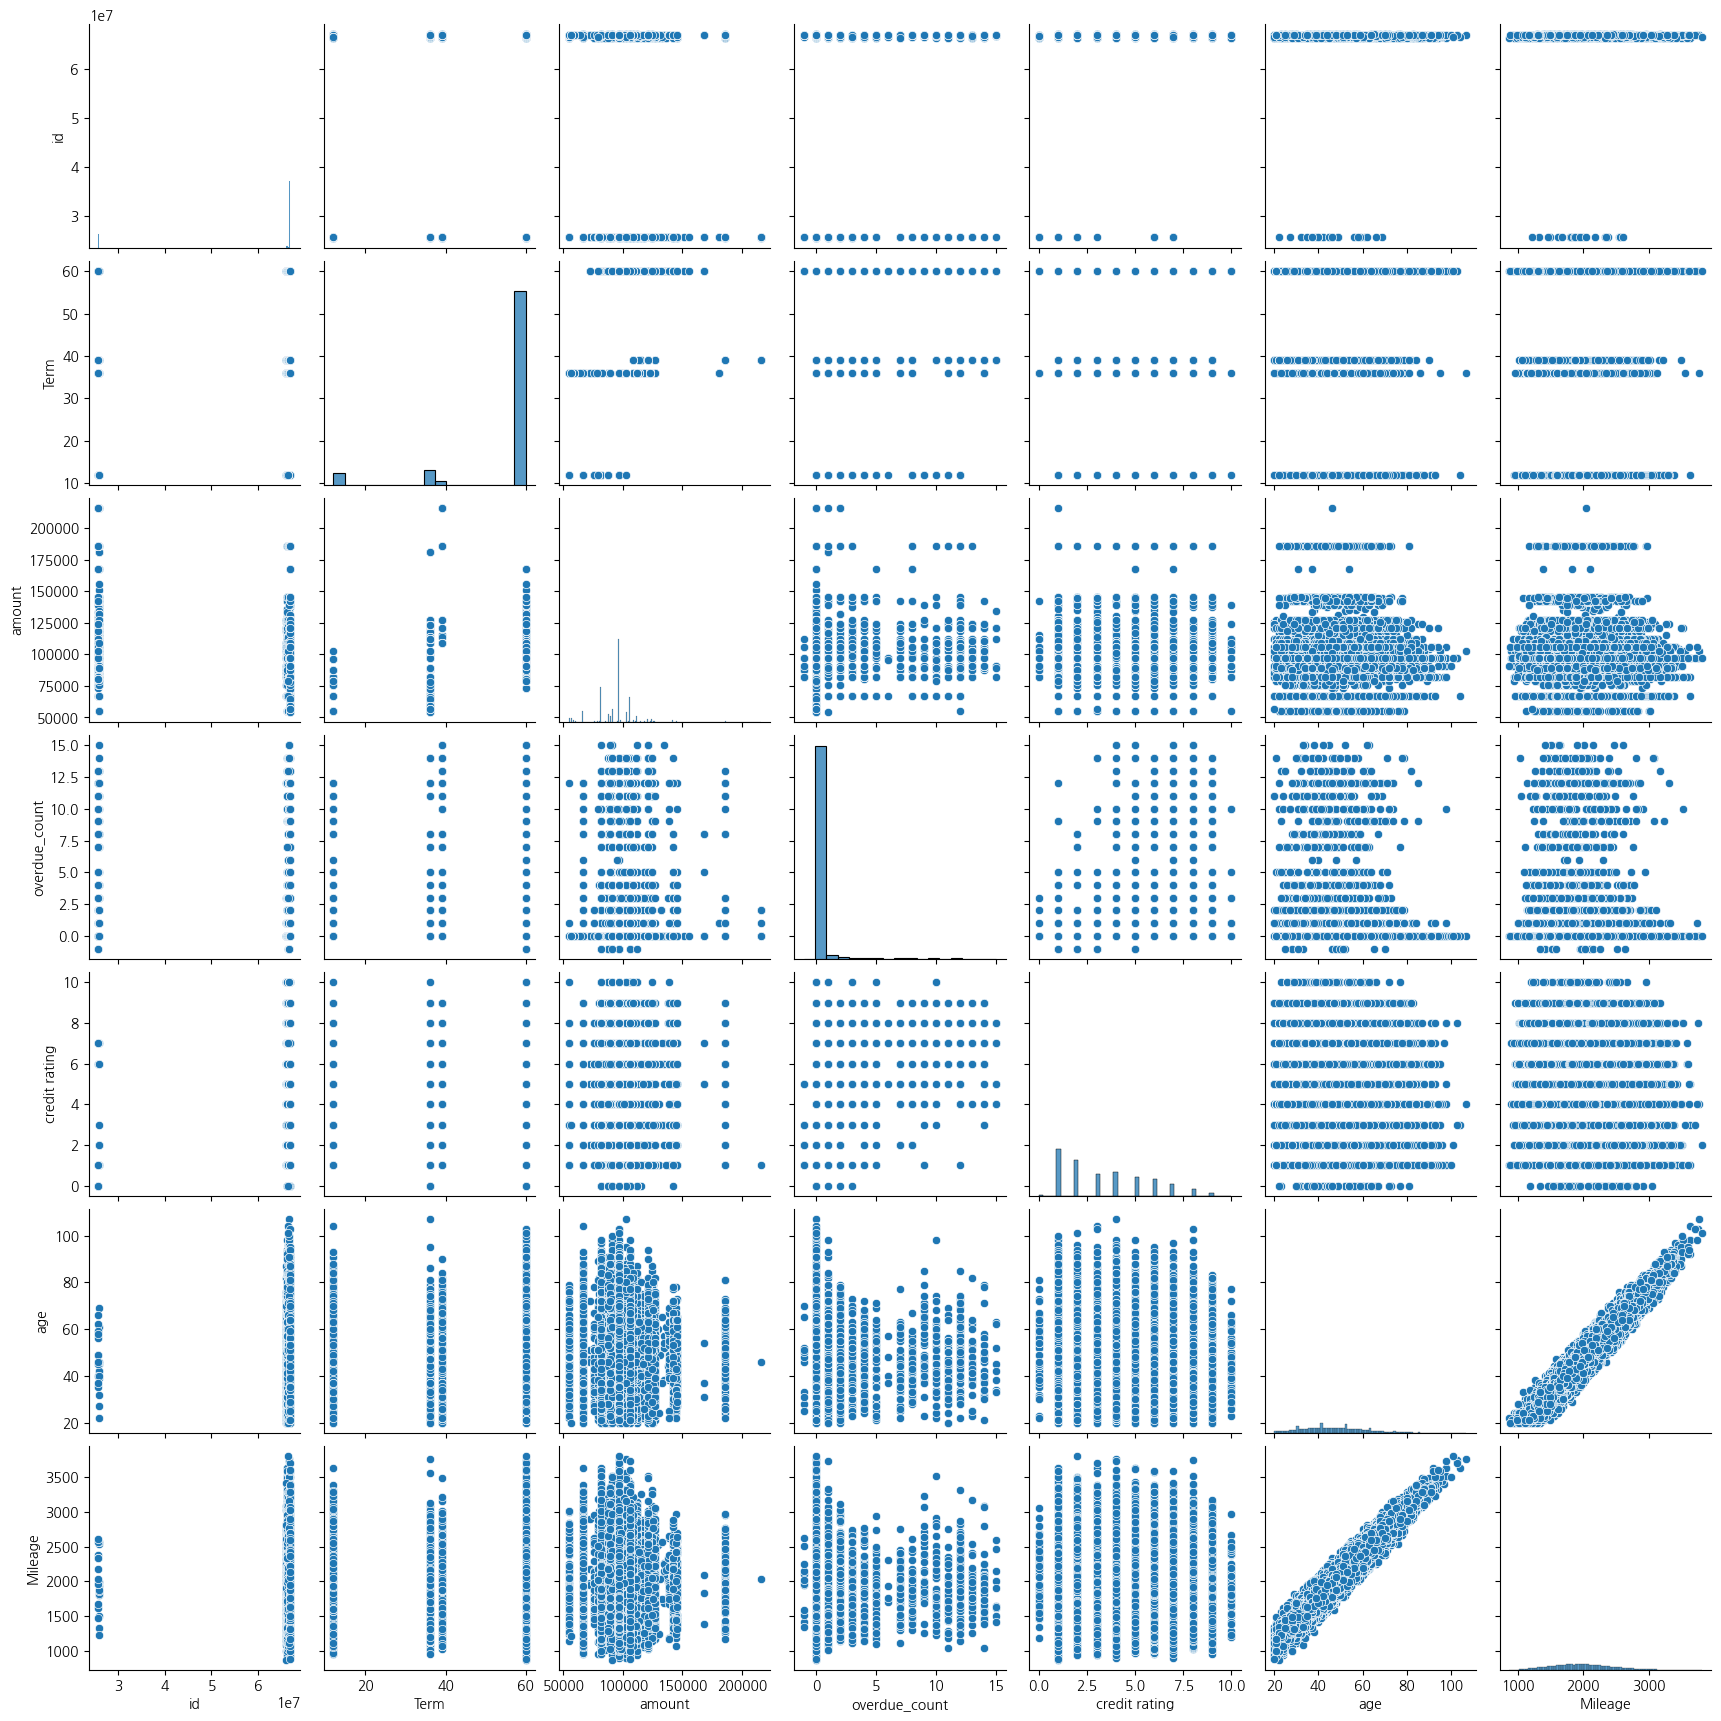

In [19]:
sns.pairplot(df1)

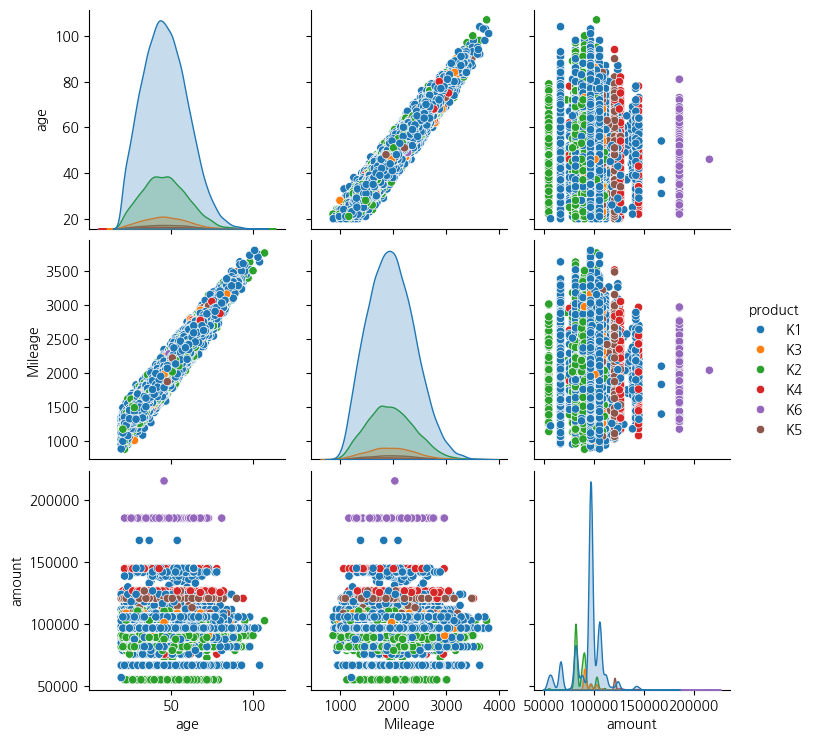

In [21]:
sns.pairplot(df1[['age','Mileage','amount','product']],hue='product')

In [22]:
df1.corr()

<ipython-input-22-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


In [39]:
p1 = pd.pivot_table(data=df1, index='channel', values='amount', aggfunc = 'sum')
p1.sort_values(by = 'amount', ascending = False).head(10)
top_list = p1.sort_values(by = 'amount', ascending = False).head(5).index.tolist()

In [35]:
df1['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

<Axes: xlabel='channel', ylabel='amount'>

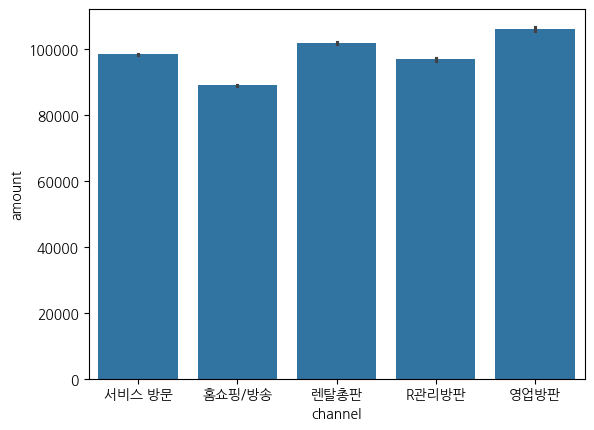

In [40]:
sns.barplot(data=df1, x='channel', y='amount', order = top_list)

<Axes: xlabel='channel', ylabel='amount'>

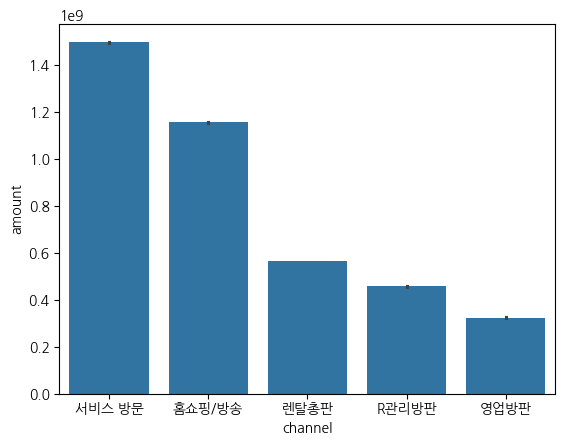

In [41]:
sns.barplot(data=df1, x='channel', y='amount', order = top_list, estimator = sum)

<ipython-input-42-3b783981e0e7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='channel', y='amount', order = top_list, estimator = sum, ci=None)


<Axes: xlabel='channel', ylabel='amount'>

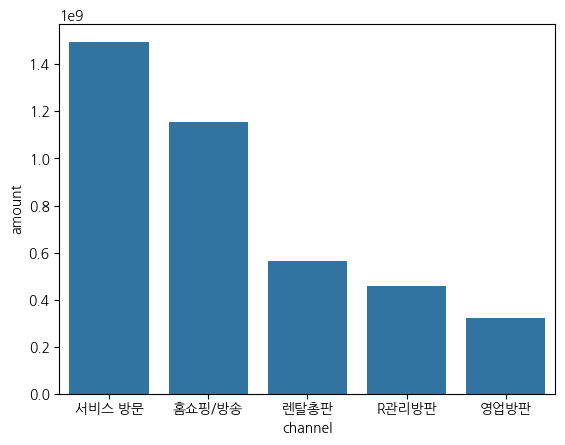

In [42]:
sns.barplot(data=df1, x='channel', y='amount', order = top_list, estimator = sum, ci=None)

<ipython-input-43-7212963484e4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='channel', y='amount', order = top_list, estimator = sum, ci=None, hue='type_of_contract')


<Axes: xlabel='channel', ylabel='amount'>

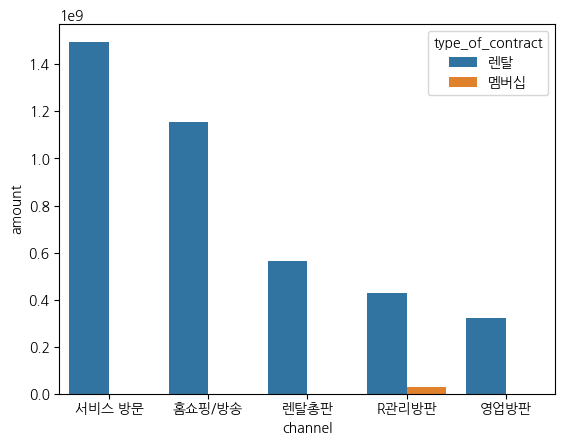

In [43]:
sns.barplot(data=df1, x='channel', y='amount', order = top_list, estimator = sum, ci=None, hue='type_of_contract')

<Axes: xlabel='channel', ylabel='amount'>

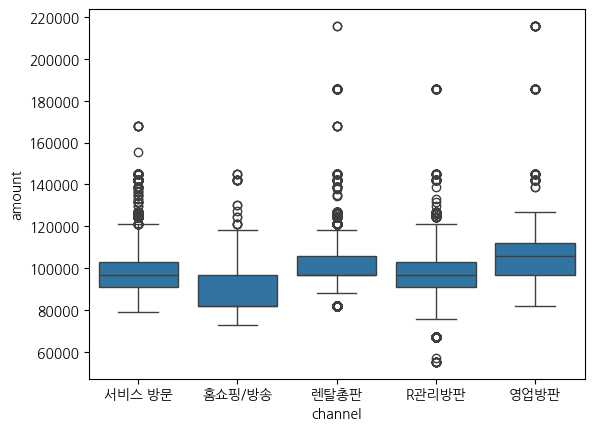

In [45]:
sns.boxplot(data=df1, x='channel',y='amount', order = top_list)

In [46]:
%matplotlib tk

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running